In [2]:
import os
import matplotlib
import numpy as np
import pandas as pd
from tqdm import trange, tqdm

In [20]:
matplotlib.rcParams['pdf.fonttype'] = 42

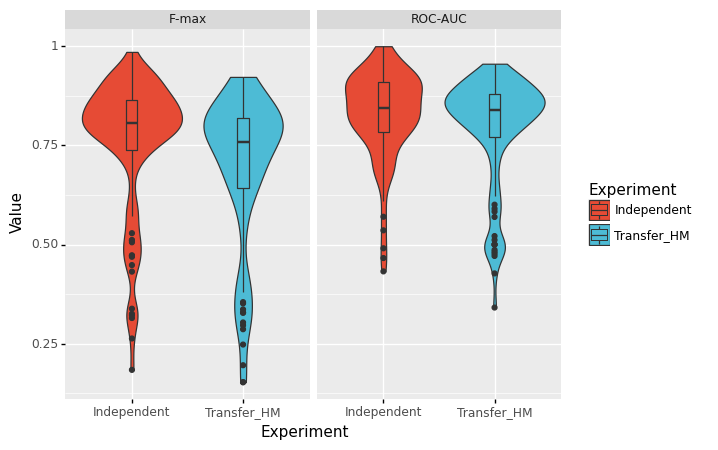

<ggplot: (8774712733010)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.8 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure_performance_across_models.pdf


In [7]:
from plotnine import *

metrics =[pd.read_csv('experiments/exp_{}/Eval_{}/overall.csv'.format(i, suffix), index_col=0).rename(columns=lambda x: '{}-exp_{}-{}'.format(x, i, suffix)).dropna()
        for i in range(5) for suffix in ['Independent', 'Transfer_HM']]
overall = pd.concat(metrics, axis=1)
overall
overall = overall.reset_index().melt(id_vars=['index'], value_vars=overall.columns.tolist(), var_name='metric').dropna()
overall['Experiment'] = overall['metric'].str.split('-').apply(lambda x: '{}'.format( x[3]))#.map({'Adapt_ft': 'Transfer (GM)', 'Adapt_ft_human': 'Transfer (HM)', 'Train': 'Independent'})
overall['Metric'] = overall['metric'].str.split('-').apply(lambda x: '{}-{}'.format(x[0], x[1]))

from plotnine import *
plot = (ggplot(overall, aes(x='Experiment', y='value', fill='Experiment'))
         + geom_violin()
         + geom_boxplot(width=0.1)
         + scale_fill_manual(['#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','#8491B4FF','#91D1C2FF'])
         #+ theme(axis_title_x=element_blank(), axis_text_x=element_blank())
         + xlab('Experiment')
         + ylab('Value')
         + facet_wrap('Metric'))
print(plot)
plot.save('Figure_performance_across_models.pdf', dpi=120, width=4.8, height=4.8)

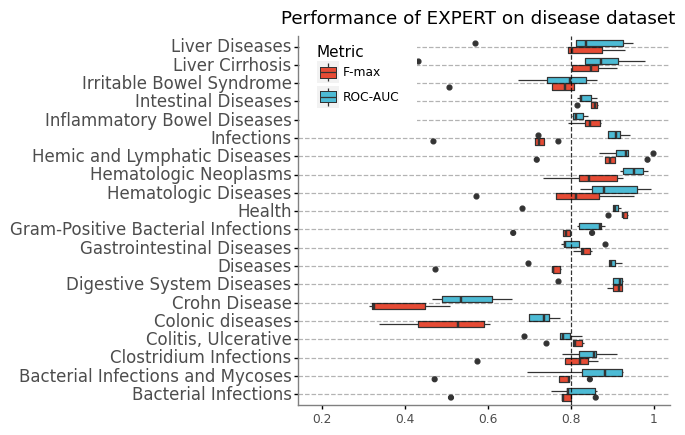

<ggplot: (8768079377195)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.8 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure_Independent_performance.pdf


In [21]:
from plotnine import *

metrics =[pd.read_csv('experiments/exp_{}/Eval_{}/overall.csv'.format(i, 'Independent'), index_col=0).rename(columns=lambda x: '{}-exp_{}'.format(x, i)).dropna() for i in range(5)]
overall = pd.concat(metrics, axis=1)
overall
overall = overall.reset_index().melt(id_vars=['index'], value_vars=overall.columns.tolist(), var_name='metric').dropna()
overall['Metric'] = overall['metric'].apply(lambda x: '-'.join(x.split('-')[0:2]))
overall = overall.rename(columns={'index': 'Phenotype'}).drop(columns=['metric']).reset_index()
overall['Phenotype'] = overall['Phenotype'].apply(lambda x: x.split(':')[-1])
overall = overall.dropna()
from plotnine import *
import plotnine
plotnine.options.figure_size = (4.8, 4.8)
plot = (ggplot(overall, aes(x='Phenotype', y='value', fill='Metric'))
         + geom_boxplot()
         #+ geom_violin()
         + scale_fill_manual(['#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','#8491B4FF','#91D1C2FF'])
         + theme(panel_grid_major = element_blank(), panel_grid_minor = element_blank(), panel_background = element_blank(), 
                 legend_position = (0.25, 0.8), axis_title_y=element_blank(), axis_title_x=element_blank(), axis_text_y = element_text(size=12),
                 axis_line_x = element_line(color="gray", size = 1), axis_line_y = element_line(color="gray", size = 1))
         + geom_vline(xintercept = np.arange(21)/1, linetype='--', alpha=0.3)
         + geom_hline(yintercept = 0.8, linetype='--', alpha=0.8)
         + scale_y_continuous(breaks=[0.2, 0.4, 0.6, 0.8, 1], minor_breaks=[])
         + coord_flip()
         + ggtitle('Performance of EXPERT on disease dataset')
       )
print(plot)
plot.save('Figure_Independent_performance.pdf', dpi=120, width=4.8, height=4.8)

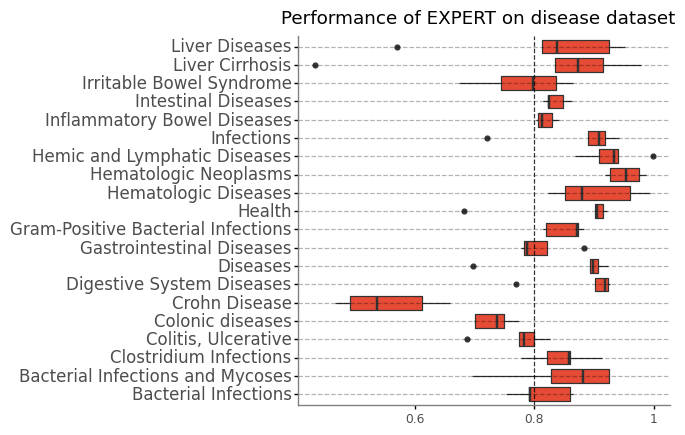

<ggplot: (8768077080890)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.8 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure_Independent_performance_AUC.pdf


In [67]:
from plotnine import *

metrics =[pd.read_csv('experiments/exp_{}/Eval_{}/overall.csv'.format(i, 'Independent'), index_col=0).rename(columns=lambda x: '{}-exp_{}'.format(x, i)).dropna() for i in range(5)]
overall = pd.concat(metrics, axis=1)
overall
overall = overall.reset_index().melt(id_vars=['index'], value_vars=overall.columns.tolist(), var_name='metric').dropna()
overall['Metric'] = overall['metric'].apply(lambda x: '-'.join(x.split('-')[0:2]))
overall = overall.rename(columns={'index': 'Phenotype'}).drop(columns=['metric']).reset_index()
overall['Phenotype'] = overall['Phenotype'].apply(lambda x: x.split(':')[-1])
overall = overall.dropna()
mean_data = overall[overall.Metric == 'ROC-AUC'].groupby(by=['Phenotype', 'Metric'], as_index=False).mean().round(3)
mean_data['pos'] = mean_data['value'] + 0.15
from plotnine import *
import plotnine
plotnine.options.figure_size = (4.8, 4.8)
plot = (ggplot(overall[overall.Metric == 'ROC-AUC'], aes(x='Phenotype', y='value', fill='Metric'))
         #+ geom_point()
         + geom_boxplot(show_legend=False)
         #+ geom_point(aes(y='value'), data=mean_data, color='#F39B7FFF', shape='.', size=8)
         + scale_fill_manual(['#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','#8491B4FF','#91D1C2FF'])
         + theme(panel_grid_major = element_blank(), panel_grid_minor = element_blank(), panel_background = element_blank(), 
                 legend_position = (0.25, 0.8), axis_title_y=element_blank(), axis_title_x=element_blank(), axis_text_y = element_text(size=12),
                 axis_line_x = element_line(color="gray", size = 1), axis_line_y = element_line(color="gray", size = 1))
         + geom_vline(xintercept = np.arange(21)/1, linetype='--', alpha=0.3)
         + geom_hline(yintercept = 0.8, linetype='--', alpha=0.8)
         + scale_y_continuous(breaks=[0.2, 0.4, 0.6, 0.8, 1], minor_breaks=[])
         + coord_flip()
         + ggtitle('Performance of EXPERT on disease dataset')
       )
print(plot)
plot.save('Figure_Independent_performance_AUC.pdf', dpi=120, width=4.8, height=4.8)

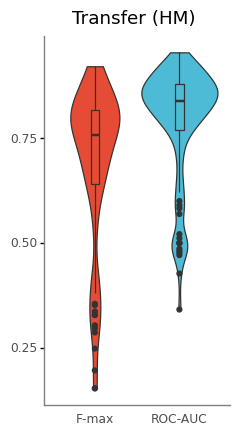

<ggplot: (8774713128756)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 2.4 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure_Transfer_(HM)_performance.pdf


In [12]:
from plotnine import *

metrics =[pd.read_csv('experiments/exp_{}/Eval_{}/overall.csv'.format(i, 'Transfer_HM'), index_col=0).rename(columns=lambda x: '{}-exp_{}-{}'.format(x, i, 'Transfer_HM')).dropna() for i in range(5)]
overall = pd.concat(metrics, axis=1)

overall = overall.reset_index().melt(id_vars=['index'], value_vars=overall.columns.tolist(), var_name='metric').dropna()
overall['Metric'] = overall['metric'].apply(lambda x: '-'.join(x.split('-')[0:2]))
overall['Experiment'] = overall['metric'].str.split('-').apply(lambda x: '{}'.format(x[3]))#.map({'Adapt_ft': 'Transfer (GM)', 'Adapt_ft_human': 'Transfer (HM)', 'Train': 'Independent'})
overall = overall.rename(columns={'index': 'Phenotype'}).drop(columns=['metric']).reset_index()
from plotnine import *
import plotnine
plotnine.options.figure_size = (2.4, 4.8)
plot = (ggplot(overall, aes(x='Metric', y='value', fill='Metric'))
         + geom_violin(show_legend=False)
         + geom_boxplot(width=0.1, show_legend=False)
         + scale_fill_manual(['#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','#8491B4FF','#91D1C2FF'])
         + theme(axis_title_y=element_blank())
         + theme(axis_title_x=element_blank())
         + theme(panel_grid_major = element_blank(), panel_grid_minor = element_blank(), panel_background = element_blank(), axis_ticks_major_x=element_blank(),
                 axis_line_x = element_line(color="gray", size = 1), axis_line_y = element_line(color="gray", size = 1))
         + guides(fill=False)
         + ggtitle('Transfer (HM)')
       )
print(plot)
plot.save('Figure_Transfer_(HM)_performance.pdf', dpi=120, width=2.4, height=4.8)